In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
tes = pd.read_csv('../Capstone_csv_file/tes_100+_yds_salary_17-18')

In [3]:
tes.dtypes

NAME              object
100+ YDS           int64
100+ YDS_rank    float64
salary             int64
dtype: object

In [4]:
tes.head()

,NAME,100+ YDS,100+ YDS_rank,salary
0,Travis Kelce,4,1.0,9368400
1,Rob Gronkowski,3,2.0,9000000
2,Jared Cook,2,3.0,5300000
3,Charles Clay,1,7.0,7600000
4,Ed Dickson,1,7.0,2033333


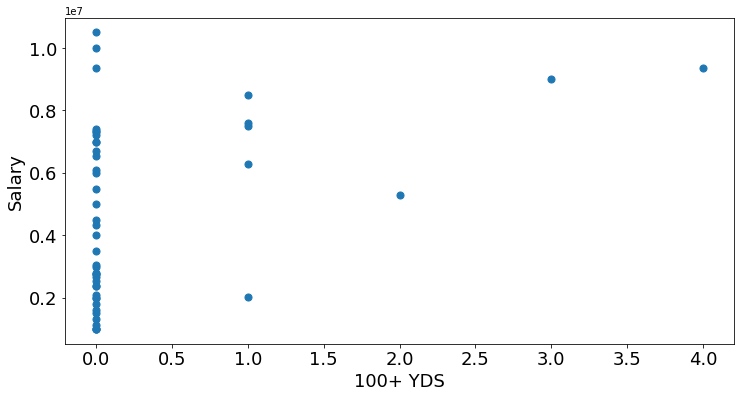

In [5]:
ax = tes.plot(kind="scatter", x = '100+ YDS',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('100+ YDS', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(tes.loc[:, ['100+ YDS', 'salary']])

In [7]:
X.mean(axis = 0)

array([1.18108832e-17, 4.72435330e-18])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-0.37389876,  0.61301115],
       [-0.32159745, -0.87250505],
       [ 4.01941171,  1.59847699],
       [ 1.13237911,  0.83132562],
       [-0.37389876,  1.87246474]])

In [11]:
km.predict(X)

array([2, 2, 3, 3, 1, 3, 3, 3, 4, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 4, 0, 4, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1], dtype=int32)

In [12]:
tes['clusters'] = km.labels_
tes.head()

,NAME,100+ YDS,100+ YDS_rank,salary,clusters
0,Travis Kelce,4,1.0,9368400,2
1,Rob Gronkowski,3,2.0,9000000,2
2,Jared Cook,2,3.0,5300000,3
3,Charles Clay,1,7.0,7600000,3
4,Ed Dickson,1,7.0,2033333,1


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[-5.55111512e-17,  6.42980769e+06],
       [ 4.16666667e-02,  2.27776683e+06],
       [ 3.50000000e+00,  9.18420000e+06],
       [ 1.20000000e+00,  7.04000000e+06],
       [ 0.00000000e+00,  9.95000000e+06]])

In [14]:
tes.groupby('clusters')[['100+ YDS', 'salary']].mean()

,100+ YDS,salary
clusters,,
0,0.000000,6.429808e+06
1,0.041667,2.277767e+06
2,3.500000,9.184200e+06
3,1.200000,7.040000e+06
4,0.000000,9.950000e+06


In [15]:
centroids = tes.groupby('clusters')[['100+ YDS', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

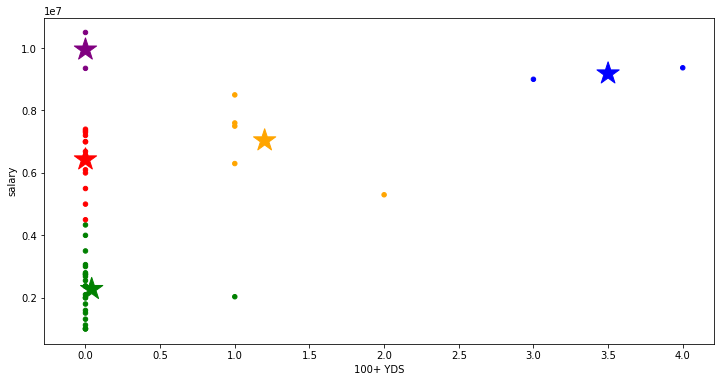

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
tes['color'] = tes['clusters'].map(lambda p: colors[p])

ax = tes.plot(    
    kind = 'scatter', 
    x = '100+ YDS', y = 'salary',
    figsize = (12,6),
    c = tes['color']
);

centroids.plot(
    kind = 'scatter', 
    x = '100+ YDS', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

8.318566414308304

In [18]:
silhouette_score(X, km.labels_)

0.6351876584265311